Amabel Nabila <br>


SELECT trips.trip_id, trips.start_date, trips.start_station_name, 
trips.end_station_name, trips.start_station_latitude, trips.start_station_longitude, 
trips.end_station_latitude, trips.end_station_longitude, stations.region_id

FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` as trips 

JOIN `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info` as stations
ON trips.start_station_id = stations.station_id
WHERE (trips.start_station_name != trips.end_station_name) AND
(trips.start_station_latitude IS NOT NULL) AND
(trips.start_station_longitude IS NOT NULL) AND
(trips.end_station_latitude IS NOT NULL) AND
(trips.end_station_longitude IS NOT NULL) AND
(trips.start_date >='2017-10-04' AND trips.start_date <= '2018-03-04');

Copy the query results that have been made on the Google Cloud Platform on the notebook

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import trapz

Import the required libraries

# Data Loading

In [2]:
df = pd.read_csv('h8dsft_P0GC2_Set_1_amabelN.csv')
df

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,1692017111411332000,2017-11-14 11:33:20 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
1,3002017110116172700,2017-11-01 16:17:27 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
2,25652017100616123900,2017-10-06 16:12:39 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
3,10092018011910520100,2018-01-19 10:52:01 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
4,23532017101109352200,2017-10-11 09:35:22 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
...,...,...,...,...,...,...,...,...,...
449742,1762017121917432100,2017-12-19 17:43:21 UTC,Civic Center/UN Plaza BART Station (Market St ...,San Francisco Caltrain Station 2 (Townsend St...,37.781074,-122.411738,37.776639,-122.395526,3
449743,30582018012713534000,2018-01-27 13:53:40 UTC,Civic Center/UN Plaza BART Station (Market St ...,San Francisco Caltrain Station 2 (Townsend St...,37.781074,-122.411738,37.776639,-122.395526,3
449744,3202018012916583800,2018-01-29 16:58:38 UTC,Civic Center/UN Plaza BART Station (Market St ...,San Francisco Caltrain Station 2 (Townsend St...,37.781074,-122.411738,37.776639,-122.395526,3
449745,25502018021316073600,2018-02-13 16:07:36 UTC,Civic Center/UN Plaza BART Station (Market St ...,San Francisco Caltrain Station 2 (Townsend St...,37.781074,-122.411738,37.776639,-122.395526,3


Calling the data to be used

# Data Overview

In [3]:
df.head()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,1692017111411332000,2017-11-14 11:33:20 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
1,3002017110116172700,2017-11-01 16:17:27 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
2,25652017100616123900,2017-10-06 16:12:39 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
3,10092018011910520100,2018-01-19 10:52:01 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
4,23532017101109352200,2017-10-11 09:35:22 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12


Calling head to get the top n rows of data

In [4]:
df.tail()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
449742,1762017121917432100,2017-12-19 17:43:21 UTC,Civic Center/UN Plaza BART Station (Market St ...,San Francisco Caltrain Station 2 (Townsend St...,37.781074,-122.411738,37.776639,-122.395526,3
449743,30582018012713534000,2018-01-27 13:53:40 UTC,Civic Center/UN Plaza BART Station (Market St ...,San Francisco Caltrain Station 2 (Townsend St...,37.781074,-122.411738,37.776639,-122.395526,3
449744,3202018012916583800,2018-01-29 16:58:38 UTC,Civic Center/UN Plaza BART Station (Market St ...,San Francisco Caltrain Station 2 (Townsend St...,37.781074,-122.411738,37.776639,-122.395526,3
449745,25502018021316073600,2018-02-13 16:07:36 UTC,Civic Center/UN Plaza BART Station (Market St ...,San Francisco Caltrain Station 2 (Townsend St...,37.781074,-122.411738,37.776639,-122.395526,3
449746,19212017112909285500,2017-11-29 09:28:55 UTC,Civic Center/UN Plaza BART Station (Market St ...,San Francisco Caltrain Station 2 (Townsend St...,37.781074,-122.411738,37.776639,-122.395526,3


Calling tail to retrieve the last n rows of data

# Problem 1

1. Buatlah dua variable baru yang bernama start_stations dan end_stations yang masing-masing berisikan list nama stasiun awal dan stasiun akhir. Pastikan tidak ada nama stasiun yang duplikat di masing-masing variable.

In [5]:
start_stations = df.drop_duplicates(subset=['start_station_name'])['start_station_name']
start_stations

0                                                 Snow Park
404                                              SAP Center
524                                             Cahill Park
778                                             Duboce Park
1740                                            Esprit Park
                                ...                        
209802     Montgomery St BART Station (Market St at 2nd St)
214317    San Francisco Ferry Building (Harry Bridges Pl...
219867    San Francisco Public Library (Grove St at Hyde...
221587    Yerba Buena Center for the Arts (Howard St at ...
222900    Civic Center/UN Plaza BART Station (Market St ...
Name: start_station_name, Length: 267, dtype: object

Create a new variable named start_stations which contains a list of starting station names. Then drop_duplicates so that there are no duplicate station names.

In [6]:
end_stations = df.drop_duplicates(subset=['end_station_name'])['end_station_name']
end_stations

0                           Mosswood Park
8                          DeFremery Park
9                        San Antonio Park
10                     12th St at 4th Ave
21                     12th St at 6th Ave
                       ...               
39960     Foothill Blvd at Harrington Ave
68821                      Tamien Station
79487            Hearst Ave at Euclid Ave
95544           Foothill Blvd at 42nd Ave
152152                   Oak St at 1st St
Name: end_station_name, Length: 282, dtype: object

Create a new variable named end_stations which contains a list of end station names. Then drop_duplicates so that there are no duplicate station names.

2. Deteksi stasiun-stasiun yang hanya terdapat di salah satu variable dan tidak di keduanya (exclusive-or/xor) menggunakan np.setxor1d(array1,array2). Outputnya akan berupa numpy array dan masukkan output tersebut ke dalam variable bernama exclusive_stations. 

In [7]:
exclusive_stations = np.setxor1d(start_stations,end_stations)
exclusive_stations

array(['2nd St at S Park St', '5th St at Brannan St',
       '5th St at Howard St', '7th St at Brannan St',
       'Colin P Kelly Jr St at Townsend St (Temporary Site)',
       'Franklin St at 14th St', 'Golden Gate Ave at Hyde St',
       'Irwin St at 8th St', 'Jackson St at 14th St',
       'Laguna St at McAllister St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Tamien Station', 'W St John St at Guadalupe River Trail',
       'Webster St at 17th St', 'Woolsey St at Sacramento St'],
      dtype=object)

Create a variable named exclusive_stations containing np.setxor1d(array1,array2), where array1 is start_stations and array2 is end_stations.

3. Buat dataframe yang berisikan cross-tabulation antara start_stations dan end_stations menggunakan pd.crosstab(pd.Series1,pd.Series2). Hasil dari langkah ini akan menghasilkan dataframe yang menginfokan berapa jumlah/frekuensi perjalanan dari start station tertentu ke end station tertentu. Hasil dari langkah ini dimasukkan ke dalam variable bernama df_matrix. 

In [8]:
df_matrix = pd.crosstab(start_stations,end_stations)
df_matrix

end_station_name,Cahill Park,Duboce Park,Mosswood Park,Precita Park,SAP Center,Snow Park
start_station_name,,,,,,
Bushrod Park,0,0,0,0,0,1
Cahill Park,0,0,0,0,1,0
Duboce Park,0,0,0,1,0,0
Precita Park,0,1,0,0,0,0
SAP Center,1,0,0,0,0,0
Snow Park,0,0,1,0,0,0


Create a variable named df_matrix which contains pd.crosstab(pd.Series1,pd.Series2), where series1 and series2 are start_stations and end_stations respectively to find out how many/frequency trips from a certain start station to a certain end station. Crosstab() function is used to compute a simple cross tabulation of two (or more) factors

In [9]:
df_matrix.shape

(6, 6)

Calling.shape to find out the number of rows and columns of the DataFrame

4. Buatlah salinan dari data yang di-load ke dalam variable bernama df_copy.

In [10]:
df_copy = df.copy()

Calling a new variable named df_copy which contains the copied DataFrame

5. Filter df_copy dimana tidak ada start_station_name dan end_station_name yang termasuk dalam list exclusive_stations.

In [11]:
df_copy = df_copy[
        (~df_copy['start_station_name'].isin(exclusive_stations)) &
        (~df_copy['end_station_name'].isin(exclusive_stations))
]
df_copy.head()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,1692017111411332000,2017-11-14 11:33:20 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
1,3002017110116172700,2017-11-01 16:17:27 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
2,25652017100616123900,2017-10-06 16:12:39 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
3,10092018011910520100,2018-01-19 10:52:01 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12
4,23532017101109352200,2017-10-11 09:35:22 UTC,Snow Park,Mosswood Park,37.807813,-122.264496,37.824931,-122.260479,12


Filter the data in df_copy so that no start_station_name and end_station_name are included in the exclusive_stations list by using .isin and to check if values are not in the DataFrame, use the ~ operator. Following this, call head() to overview the data

In [12]:
df_copy.shape

(424309, 9)

Calling.shape to find out the number of rows and columns of the DataFrame

6. Lakukan langkah 3 untuk variable df dan simpan ke dalam variable bernama df_matrix_square. Pastikan jumlah rows dan columns sama, kalau tidak ulangi dari langkah 4.

In [13]:
df_matrix_square = pd.crosstab(df_copy.start_station_name,df_copy.end_station_name)
df_matrix_square

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,12th St at 4th Ave,12th St at 6th Ave,13th St at Franklin St,14th St at Filbert St,14th St at Mandela Pkwy,14th St at Mission St,...,Washington St at 8th St,Washington St at Kearny St,Webster St at 19th St,Webster St at Grove St,Webster St at O'Farrell St,West Oakland BART Station,West St at 40th St,William St at 10th St,Willow St at Vine St,Yerba Buena Center for the Arts (Howard St at 3rd St)
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0,26,0,0,3,3,0,0,0,0,...,5,0,1,0,0,0,0,0,0,0
10th St at Fallon St,27,0,0,0,186,24,1,0,5,0,...,31,0,0,0,0,1,0,0,0,0
11th St at Bryant St,0,0,0,49,0,0,0,0,0,18,...,0,0,0,2,10,0,0,0,0,8
11th St at Natoma St,0,0,62,0,0,0,0,0,0,23,...,0,3,0,7,20,0,0,0,0,7
12th St at 4th Ave,3,308,0,0,0,1,3,0,0,0,...,9,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Oakland BART Station,0,1,0,0,0,0,4,72,424,0,...,32,0,1,0,0,0,8,0,0,0
West St at 40th St,0,0,0,0,0,0,0,0,2,0,...,2,0,2,0,0,6,0,0,0,0
William St at 10th St,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Similar to the previous step, create a variable named df_matrix_square which contains pd.crosstab() with the data df_copy, as well as columns from start_station_name, and end_station_name.  Crosstab() function is used to compute a simple cross tabulation of two (or more) factors

7. Jumlahkan nilai kolom masing-masing rows pada df_matrix_square menggunakan method sum(axis=1) dan simpan ke dalam variable bernama total_trips.

In [14]:
total_trips =  df_matrix_square.sum(axis=1)
total_trips

start_station_name
10th Ave at E 15th St                                     165
10th St at Fallon St                                     1064
11th St at Bryant St                                     1855
11th St at Natoma St                                     1886
12th St at 4th Ave                                        833
                                                         ... 
West Oakland BART Station                                1968
West St at 40th St                                        244
William St at 10th St                                     262
Willow St at Vine St                                       32
Yerba Buena Center for the Arts (Howard St at 3rd St)    2401
Length: 267, dtype: int64

Create a variable called total trips which contains the sum of the column values of each row in df_matrix_square using the sum(axis=1) method

8. Bagi setiap kolom df_matrix_square dengan menggunakan method .div(), dengan inputan parameter total_trips dan axis='rows'. Masukkan hasilnya ke variable weighted_matrix_df.

In [15]:
weighted_matrix_df = df_matrix_square.div(total_trips, axis='rows')
weighted_matrix_df

end_station_name,10th Ave at E 15th St,10th St at Fallon St,11th St at Bryant St,11th St at Natoma St,12th St at 4th Ave,12th St at 6th Ave,13th St at Franklin St,14th St at Filbert St,14th St at Mandela Pkwy,14th St at Mission St,...,Washington St at 8th St,Washington St at Kearny St,Webster St at 19th St,Webster St at Grove St,Webster St at O'Farrell St,West Oakland BART Station,West St at 40th St,William St at 10th St,Willow St at Vine St,Yerba Buena Center for the Arts (Howard St at 3rd St)
start_station_name,,,,,,,,,,,,,,,,,,,,,
10th Ave at E 15th St,0.000000,0.157576,0.000000,0.000000,0.018182,0.018182,0.000000,0.000000,0.000000,0.000000,...,0.030303,0.000000,0.006061,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000
10th St at Fallon St,0.025376,0.000000,0.000000,0.000000,0.174812,0.022556,0.000940,0.000000,0.004699,0.000000,...,0.029135,0.000000,0.000000,0.000000,0.000000,0.00094,0.000000,0.0,0.0,0.000000
11th St at Bryant St,0.000000,0.000000,0.000000,0.026415,0.000000,0.000000,0.000000,0.000000,0.000000,0.009704,...,0.000000,0.000000,0.000000,0.001078,0.005391,0.00000,0.000000,0.0,0.0,0.004313
11th St at Natoma St,0.000000,0.000000,0.032874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012195,...,0.000000,0.001591,0.000000,0.003712,0.010604,0.00000,0.000000,0.0,0.0,0.003712
12th St at 4th Ave,0.003601,0.369748,0.000000,0.000000,0.000000,0.001200,0.003601,0.000000,0.000000,0.000000,...,0.010804,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Oakland BART Station,0.000000,0.000508,0.000000,0.000000,0.000000,0.000000,0.002033,0.036585,0.215447,0.000000,...,0.016260,0.000000,0.000508,0.000000,0.000000,0.00000,0.004065,0.0,0.0,0.000000
West St at 40th St,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008197,0.000000,...,0.008197,0.000000,0.008197,0.000000,0.000000,0.02459,0.000000,0.0,0.0,0.000000
William St at 10th St,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000


Create a variable with the name weighted_matrix_df which contains df_matrix_square by using the .div() method, with the input parameters total_trips and axis='rows'

9. Konversikan weighted_matrix_df ke numpy array.

In [16]:
weighted_matrix_df = np.array(weighted_matrix_df)
weighted_matrix_df

array([[0.        , 0.15757576, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02537594, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00431267],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00832986, ..., 0.        , 0.        ,
        0.        ]])

Convert weighted_matrix_df to numpy array with np.array()

10. Hitung eigen value dan eigen vector menggunakan library numpy

In [17]:
eig_val,eig_vec = np.linalg.eig(np.array(weighted_matrix_df))

Converting eigenvalues and eigenvectors. Then, compute the eigenvalues and eigenvectors of a square array with np.linalg.eig

11. Score PageRank terdapat pada eigen vector yang eigen valuenya paling tinggi. Simpan eigen vector tersebut ke dalam variable bernama PR_Scores.

In [18]:
print('the position of the highest eigen value is ', np.argmax(eig_val))

the position of the highest eigen value is  1


To find the highest eigenvalue, use np.argmax to find out the indices of the max element of the array. The highest eigen value is  1

In [19]:
print('the position of the highest eigen vector is ', np.argmax(eig_vec[1,:]))

the position of the highest eigen vector is  13


Input the highest eigen value is 1. Then, to find the highest eigenvector, use np.argmax to find out the indices of the max element of the array. The highest eigen vector is  13

In [20]:
PR_Scores = eig_vec[13]
PR_Scores

array([-9.05239282e-03+0.00000000e+00j, -6.11990061e-02+0.00000000e+00j,
        3.54099827e-03+0.00000000e+00j,  1.34181996e-05+0.00000000e+00j,
        1.43220297e-06+0.00000000e+00j, -2.02110774e-05+0.00000000e+00j,
       -1.66215832e-05+0.00000000e+00j,  2.06962989e-08+0.00000000e+00j,
        8.35560277e-08+0.00000000e+00j, -1.20597554e-01+0.00000000e+00j,
        3.03849896e-07+0.00000000e+00j, -2.05500631e-05+0.00000000e+00j,
       -1.03383362e-05+0.00000000e+00j,  9.80752583e-06+0.00000000e+00j,
       -1.69017311e-08+0.00000000e+00j,  5.42366800e-06+0.00000000e+00j,
        8.07077538e-09+0.00000000e+00j, -9.61891697e-06+0.00000000e+00j,
        1.14911718e-08+0.00000000e+00j, -8.22569587e-02+0.00000000e+00j,
       -2.15590009e-05+0.00000000e+00j,  9.33495835e-07-1.48932287e-06j,
        9.33495835e-07+1.48932287e-06j,  5.83941407e-08+0.00000000e+00j,
        1.39992375e-02+0.00000000e+00j, -4.84063321e-05+0.00000000e+00j,
       -3.77923282e-02+0.00000000e+00j, -4.70676869

Create a new variable named PR_Scores which contains ig vec[] whose value is from the highest eigen vector.

12. Buat dataframe baru bernama PageRank_df dengan kolom 'start_station' yang berisikan value variable start_stations dan kolom score yang berisikan value variable PR_Scores.

In [21]:
start_stations 

0                                                 Snow Park
404                                              SAP Center
524                                             Cahill Park
778                                             Duboce Park
1740                                            Esprit Park
                                ...                        
209802     Montgomery St BART Station (Market St at 2nd St)
214317    San Francisco Ferry Building (Harry Bridges Pl...
219867    San Francisco Public Library (Grove St at Hyde...
221587    Yerba Buena Center for the Arts (Howard St at ...
222900    Civic Center/UN Plaza BART Station (Market St ...
Name: start_station_name, Length: 267, dtype: object

Call start_stations for overview data

In [22]:
PageRank_df = pd.DataFrame({'start_station' : start_stations,'score':PR_Scores}).sort_values(by='score', ascending=False)
PageRank_df

,start_station,score
166651,The Embarcadero at Bryant St,0.210173+0.000000j
219867,San Francisco Public Library (Grove St at Hyde...,0.195674+0.036237j
214317,San Francisco Ferry Building (Harry Bridges Pl...,0.195674-0.036237j
184949,Eureka Valley Recreation Center,0.194766+0.000000j
182964,Paseo De San Antonio at 2nd St,0.184790+0.053450j
...,...,...
133805,Shattuck Ave at 55th Ave,-0.164268-0.036742j
165999,Isabella St at San Pablo Ave,-0.219366+0.044465j
165455,Grand Ave at Santa Clara Ave,-0.219366-0.044465j
180905,26th Ave at International Blvd,-0.238564+0.025763j


Create a new dataframe named PageRank_df with column 'start_station' containing the start_stations variable value and score column containing the PR_Scores variable value. Then, use sort_values(by='score', ascending=False) to find out the highest score on the station which is sorted from highest to lowest

13. Tampilkan head dari dataframe PageRank_df!

In [23]:
PageRank_df.head()

,start_station,score
166651,The Embarcadero at Bryant St,0.210173+0.000000j
219867,San Francisco Public Library (Grove St at Hyde...,0.195674+0.036237j
214317,San Francisco Ferry Building (Harry Bridges Pl...,0.195674-0.036237j
184949,Eureka Valley Recreation Center,0.194766+0.000000j
182964,Paseo De San Antonio at 2nd St,0.184790+0.053450j


Calling head to get the top n rows of data

# Problem 2

1. Buat variable baru bernama df_coor_stations yang berisikan data yang sudah di-load dimana kolom region_id = 3. Pastikan tidak ada data yang duplikat dan hanya menyertakan kolom start_station_name,start_station_latitude, dan start_station_longitude. Urutkan pula dataframe tersebut berdasarkan start_station_longitude dari nilai terkecil hingga terbesar.

In [24]:
df_coor_stations = pd.read_csv('h8dsft_P0GC2_Set_1_amabelN.csv')

df_coor_stations= df_coor_stations[
    (df_coor_stations['region_id'] ==3)
][['start_station_name','start_station_latitude','start_station_longitude']].sort_values(by='start_station_longitude', ascending=True)

Create a new variable named df_coor_stations which contains the data that has been loaded where the column region_id = 3. Only include the fields start_station_name, start_station_latitude, and start_station_longitude. Then, use sort_values(by='start_station_longitude', ascending=True) to sort those dataframes by start_station_longitude from smallest to largest.

In [25]:
data = df_coor_stations.drop_duplicates()[['start_station_name','start_station_latitude','start_station_longitude']]
data

,start_station_name,start_station_latitude,start_station_longitude
92140,Central Ave at Fell St,37.773311,-122.444293
364935,McAllister St at Baker St,37.777416,-122.441838
395399,O'Farrell St at Divisadero St,37.782405,-122.439446
91610,Broderick St at Oak St,37.773063,-122.439078
95836,Grove St at Divisadero,37.775946,-122.437777
...,...,...,...
402227,The Embarcadero at Steuart St,37.791464,-122.391034
226972,Esprit Park,37.761634,-122.390648
306720,Spear St at Folsom St,37.789677,-122.390428
186381,2nd St at Townsend St - Coming Soon,37.780526,-122.390288


Create a new variable named data and call drop_duplicates() to prevent duplicate data

2. Plot grafik area stasiun-stasiun di San Fransisco menggunakan method .plot(). Catatan: Gunakan arahan berikut dalam penggunaan method .plot(), .plot(x='nama kolom untuk sumbu x',y='nama kolom untuk sumbu y',figsize=(20,8)). Logitude merupakan sumbu x dan Latitude merupakan sumbu y.

<AxesSubplot:xlabel='start_station_longitude'>

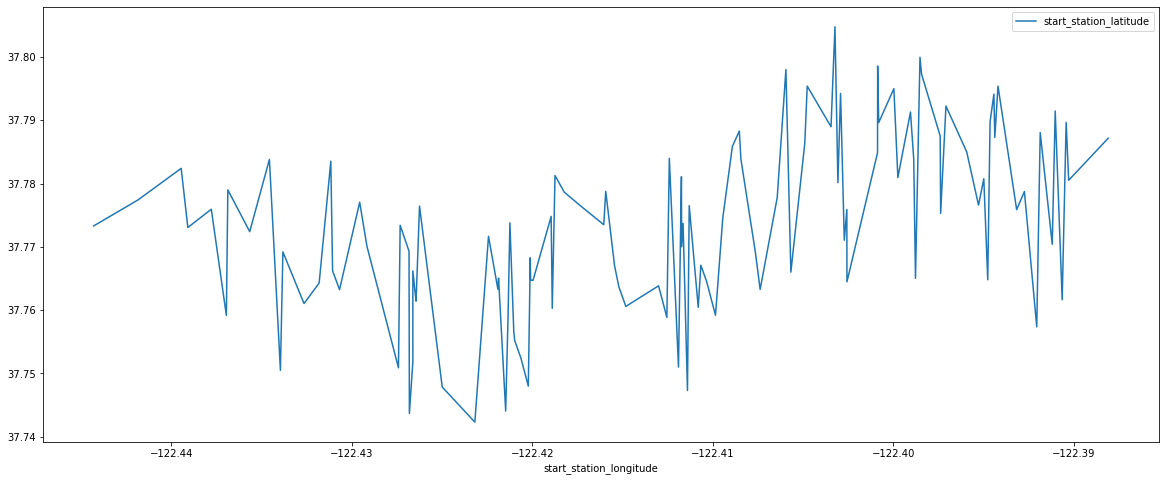

In [26]:
data.plot(
    x = 'start_station_longitude',
    y = 'start_station_latitude',
    figsize=(20,8)
)

Create a graph with the .plot() method where Logitude is the x-axis and Latitude is the y-axis.

3. Hitung luas area yang dilingkup stasiun awal menggunakan library Scipy. Hasilnya bersatuan square degree.

In [27]:
#sumbu x
longitude = data.start_station_longitude 
#sumbu y
latitude  = data.start_station_latitude 
trapz(latitude,longitude)

2.1226567872713953

Calculate the area covered by the initial station with trapz () to perform integral calculations, it cannot be done directly which requires a series of x coordinates and y coordinates first. The area covered by the initial station is 2.1226567872713953